__Author:__ Bram Van de Sande

__Date:__ 8 MAR 2018

__Outline:__ Examples of how to run aucell in different circumstances.

## Example 1: A single gene signature in a custom format

In [1]:
import pandas as pd
from pyscenic.genesig import GeneSignature
from pyscenic.aucell import create_rankings, enrichment

In [2]:
GENE_SIGNATURE_FNAME = 'oxphos_mitocomp2_genes.tsv'
EXPRESSION_MTX_FNAME = '' # Gene expression as (cell, gene) - matrix.

In [ ]:
with open(GENE_SIGNATURE_FNAME, 'r') as f:
    # Skip first line because it contains the name of the signature
    gs = GeneSignature('Gene Signature #1', 
                       'FlyBase', 
                       [line.strip() for idx, line in enumerate(f) if idx > 0])

In [ ]:
ex_matrix = pd.read_csv(EXPRESSION_MTX_FNAME, sep='\t', header=0, index_col=0)
rnk_mtx = create_rankings(ex_matrix)
aucs = enrichment(rnk_mtx, gs, rank_threshold=1200)

aucs

## Example 2: Gene signatures from a GMT file

In [4]:
import pandas as pd
import seaborn as sns
from pyscenic.genesig import GeneSignature
from pyscenic.aucell import create_rankings, enrichment

In [5]:
# A module from GeneSigDB (C6)
GMT_FNAME = 'c6.all.v6.1.symbols.gmt'
# An expression matrix from GEO
EXPRESSION_MTX_FNAME = 'GSE103322.mtx.tsv' # Gene expression as (cell, gene) - matrix.

In [6]:
signatures = GeneSignature.from_gmt(GMT_FNAME, 'HGNC', field_separator='\t', gene_separator='\t')
len(signatures)

189

In [7]:
ex_matrix = pd.read_csv(EXPRESSION_MTX_FNAME, sep='\t', header=0, index_col=0).T
ex_matrix.shape

(5902, 20684)

In [8]:
%timeit -n1 -r1 create_rankings(ex_matrix)

9.69 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
rnk_mtx = create_rankings(ex_matrix)

In [11]:
%timeit -n1 -r1 pd.concat([enrichment(rnk_mtx, signature, rank_threshold=1500) for signature in signatures]).unstack("Regulome")

25.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [12]:
aucs_mtx = pd.concat([enrichment(rnk_mtx, signature, rank_threshold=1500) for signature in signatures]).unstack("Regulome")
aucs_mtx.columns = aucs_mtx.columns.droplevel(0)

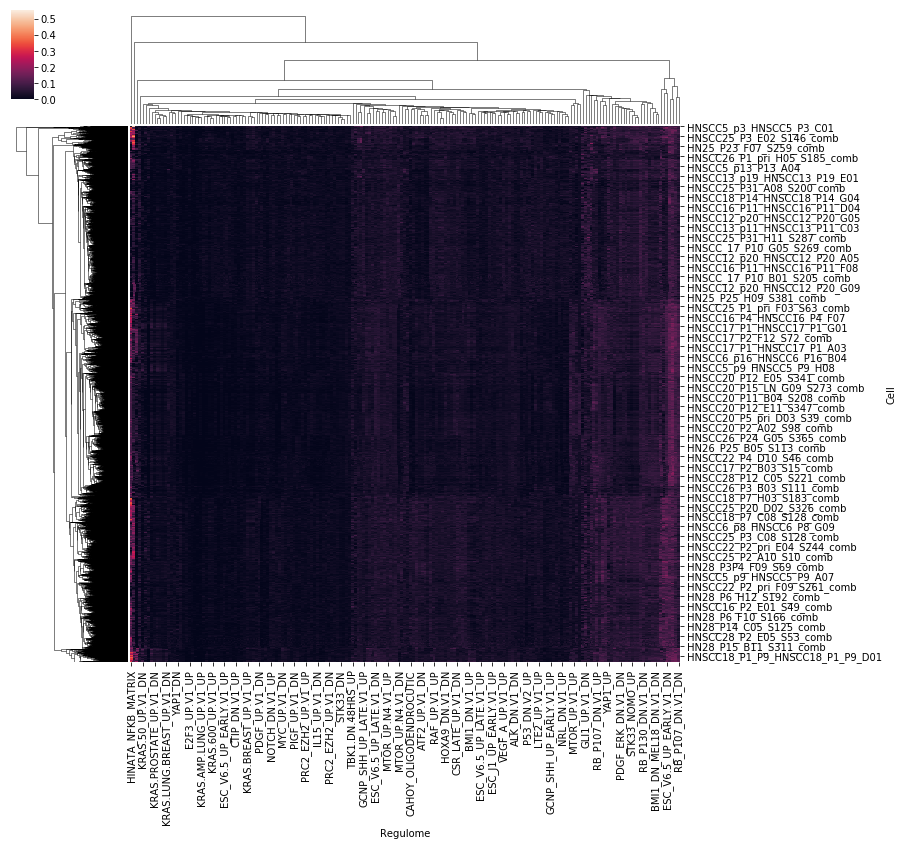

In [11]:
sns.clustermap(aucs_mtx, figsize=(12,12))